In [15]:
%pip install pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')

/tmp/ipykernel_51545/2448327255.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')


In [5]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + 'Q' + df['quarter'].astype(str))

/tmp/ipykernel_51545/3743286326.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + 'Q' + df['quarter'].astype(str))


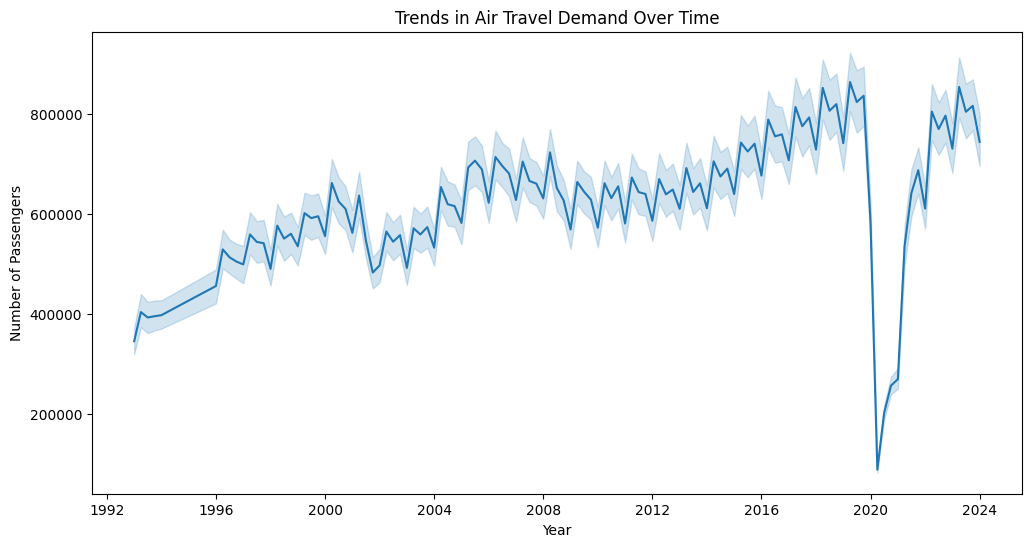

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='passengers', data=df, estimator='sum')
plt.title('Trends in Air Travel Demand Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

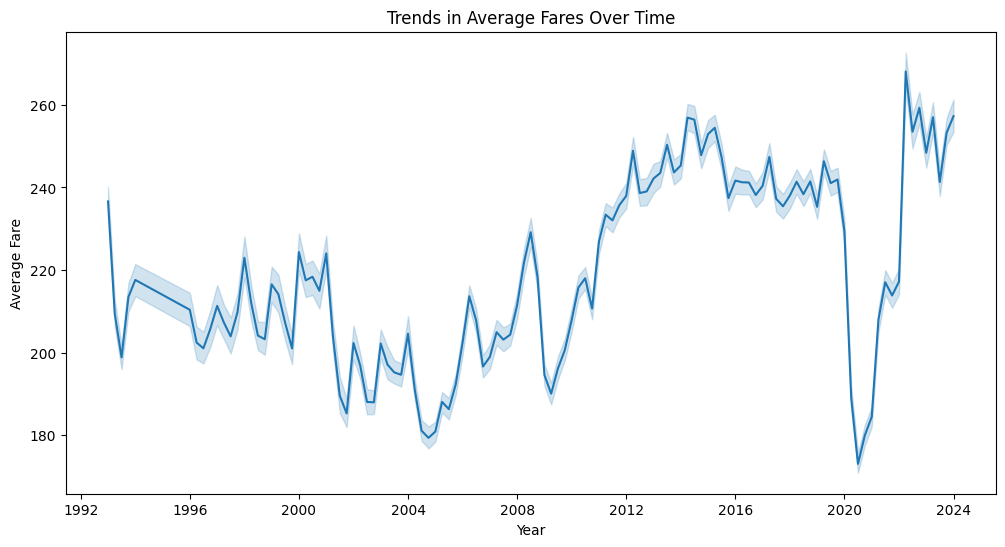

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='fare', data=df, estimator='mean')
plt.title('Trends in Average Fares Over Time')
plt.xlabel('Year')
plt.ylabel('Average Fare')
plt.show()

In [8]:
market_share = df.groupby(['Date', 'carrier_lg'])['large_ms'].mean().reset_index()

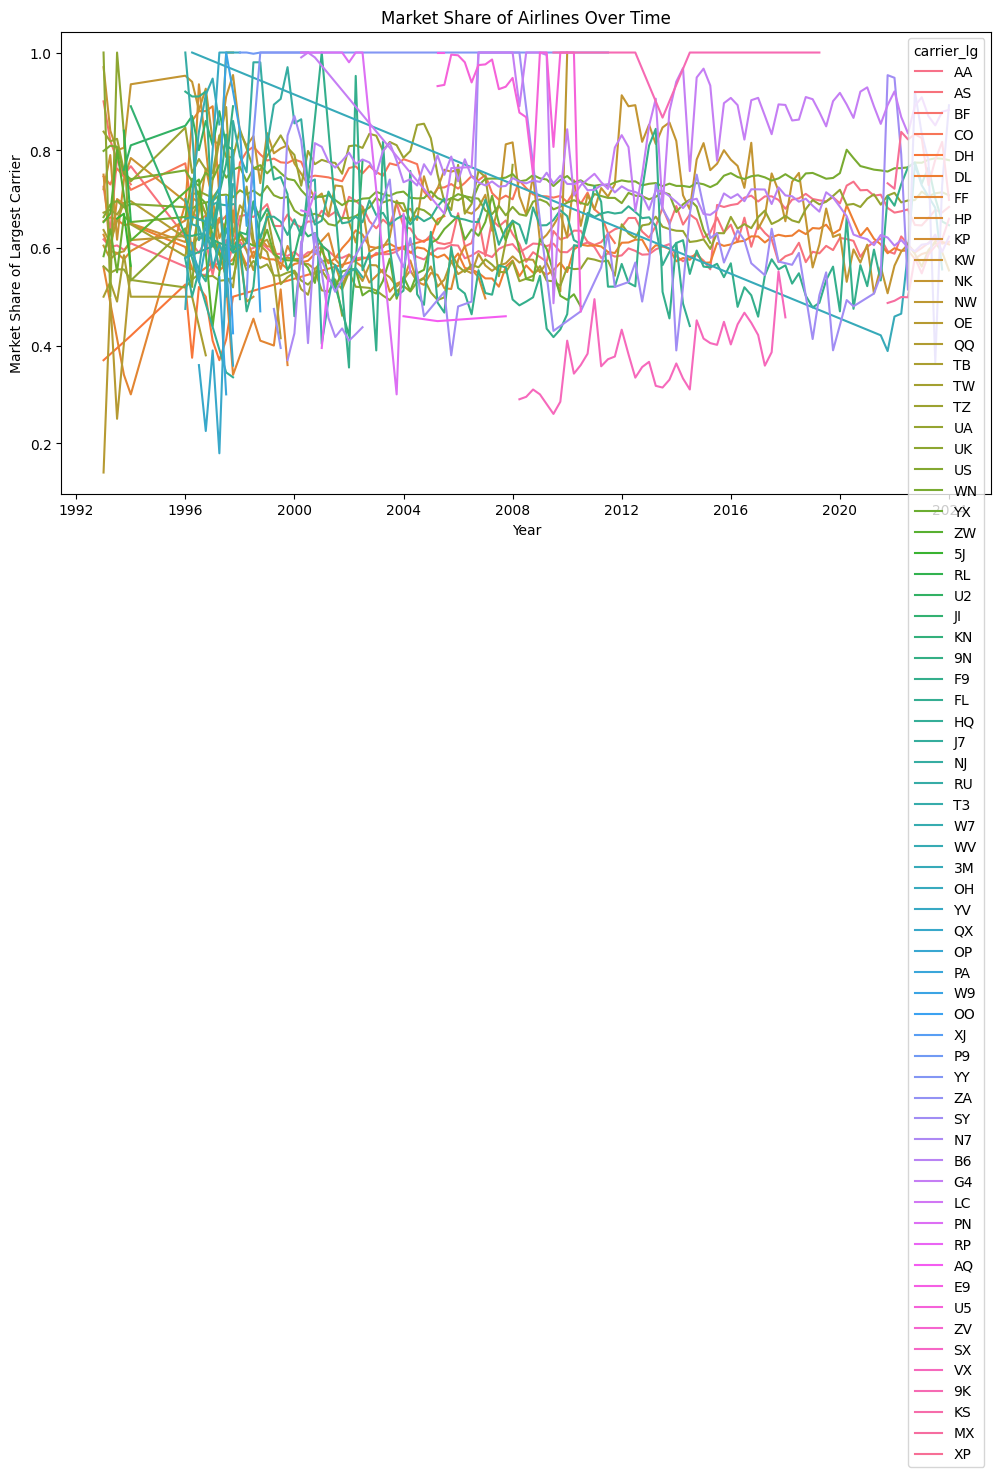

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='large_ms', hue='carrier_lg', data=market_share)
plt.title('Market Share of Airlines Over Time')
plt.xlabel('Year')
plt.ylabel('Market Share of Largest Carrier')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

In [34]:
df_clean = df.dropna(subset=features + ['fare'])
features = ['nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']
X = df_clean[features]
y = df_clean['fare']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [36]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 289.86676036856437


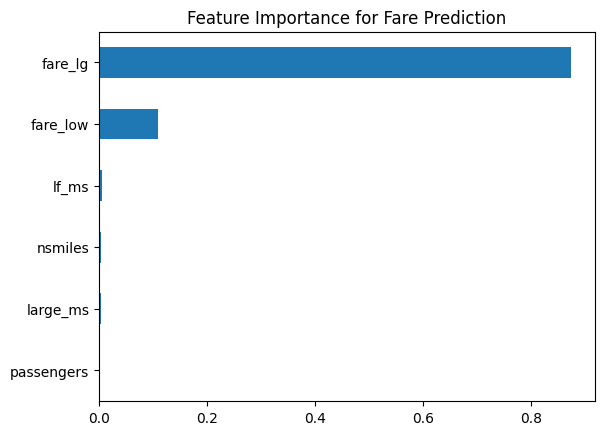

In [37]:
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance for Fare Prediction')
plt.show()


In [38]:
df['revenue'] = df['passengers'] * df['fare']

In [39]:
profitable_routes = df.groupby(['city1', 'city2'])['revenue'].sum().reset_index()
profitable_routes = profitable_routes.sort_values(by='revenue', ascending=False)

In [40]:
print(profitable_routes.head(10))


                                      city1  \
911     Los Angeles, CA (Metropolitan Area)   
1087  New York City, NY (Metropolitan Area)   
978           Miami, FL (Metropolitan Area)   
932     Los Angeles, CA (Metropolitan Area)   
314                             Chicago, IL   
1070  New York City, NY (Metropolitan Area)   
944     Los Angeles, CA (Metropolitan Area)   
305                             Chicago, IL   
60          Atlanta, GA (Metropolitan Area)   
1236  San Francisco, CA (Metropolitan Area)   

                                      city2       revenue  
911   New York City, NY (Metropolitan Area)  3.962797e+08  
1087  San Francisco, CA (Metropolitan Area)  2.942551e+08  
978   New York City, NY (Metropolitan Area)  2.626527e+08  
932   San Francisco, CA (Metropolitan Area)  2.454592e+08  
314   New York City, NY (Metropolitan Area)  1.965399e+08  
1070                            Orlando, FL  1.550236e+08  
944      Washington, DC (Metropolitan Area)  1.442056e+08  
30

In [41]:
df['potential_revenue'] = df['nsmiles'] * df['passengers']
underserved_markets = df[df['passengers'] < 1000].groupby(['city1', 'city2'])['potential_revenue'].sum().reset_index()
underserved_markets = underserved_markets.sort_values(by='potential_revenue', ascending=False)

In [42]:
print(underserved_markets.head(10))

                                      city1  \
902     Los Angeles, CA (Metropolitan Area)   
1226  San Francisco, CA (Metropolitan Area)   
935     Los Angeles, CA (Metropolitan Area)   
1235                            Seattle, WA   
1217                          San Diego, CA   
1078  New York City, NY (Metropolitan Area)   
990           Miami, FL (Metropolitan Area)   
303                             Chicago, IL   
1077  New York City, NY (Metropolitan Area)   
1175                            Phoenix, AZ   

                                      city2  potential_revenue  
902   New York City, NY (Metropolitan Area)          608725200  
1226     Washington, DC (Metropolitan Area)          606353202  
935      Washington, DC (Metropolitan Area)          466796812  
1235     Washington, DC (Metropolitan Area)          397360960  
1217     Washington, DC (Metropolitan Area)          387930735  
1078  San Francisco, CA (Metropolitan Area)          384275915  
990   San Francisco, CA (Me

In [43]:
city_economic_impact = df.groupby(['city1'])[['passengers', 'revenue']].sum().reset_index()

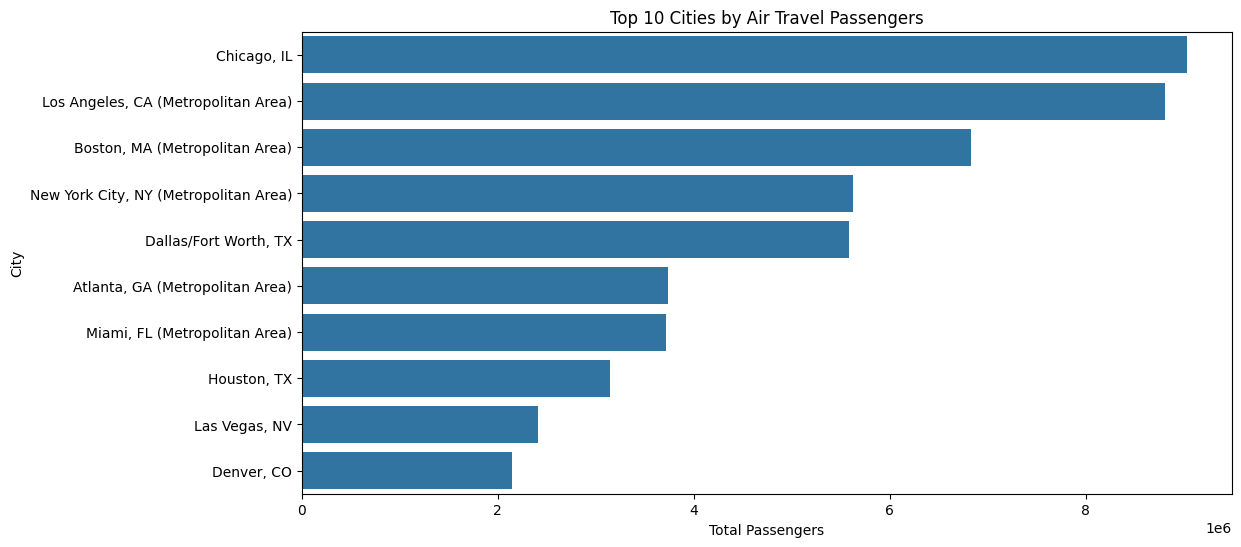

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='passengers', y='city1', data=city_economic_impact.sort_values(by='passengers', ascending=False).head(10))
plt.title('Top 10 Cities by Air Travel Passengers')
plt.xlabel('Total Passengers')
plt.ylabel('City')
plt.show()

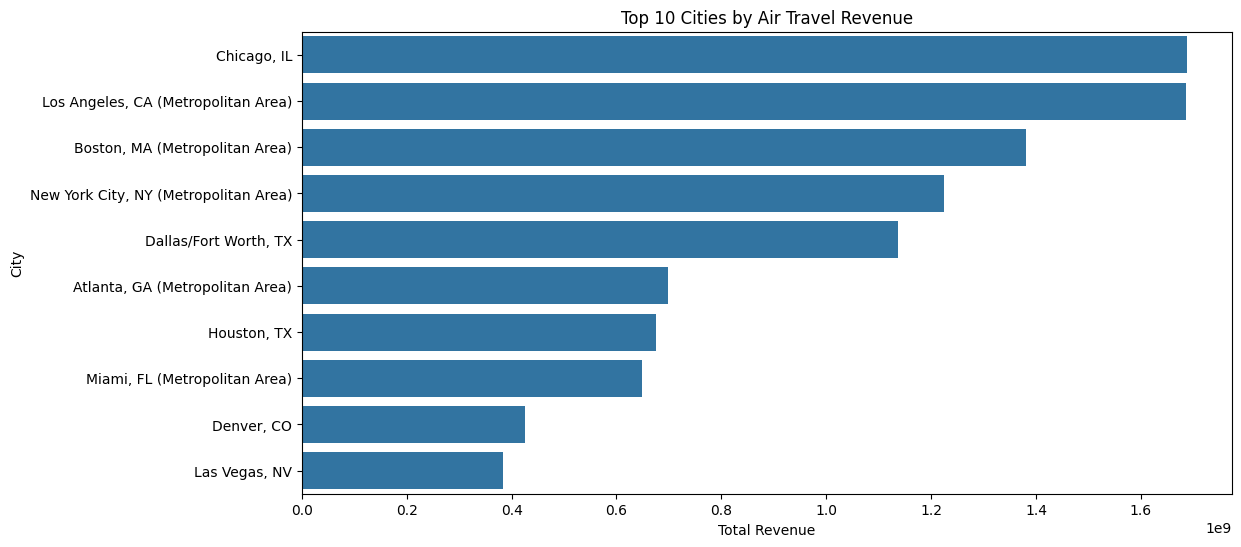

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='city1', data=city_economic_impact.sort_values(by='revenue', ascending=False).head(10))
plt.title('Top 10 Cities by Air Travel Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.show()

In [46]:
popular_routes = df.groupby(['Date', 'city1', 'city2'])['passengers'].sum().reset_index()

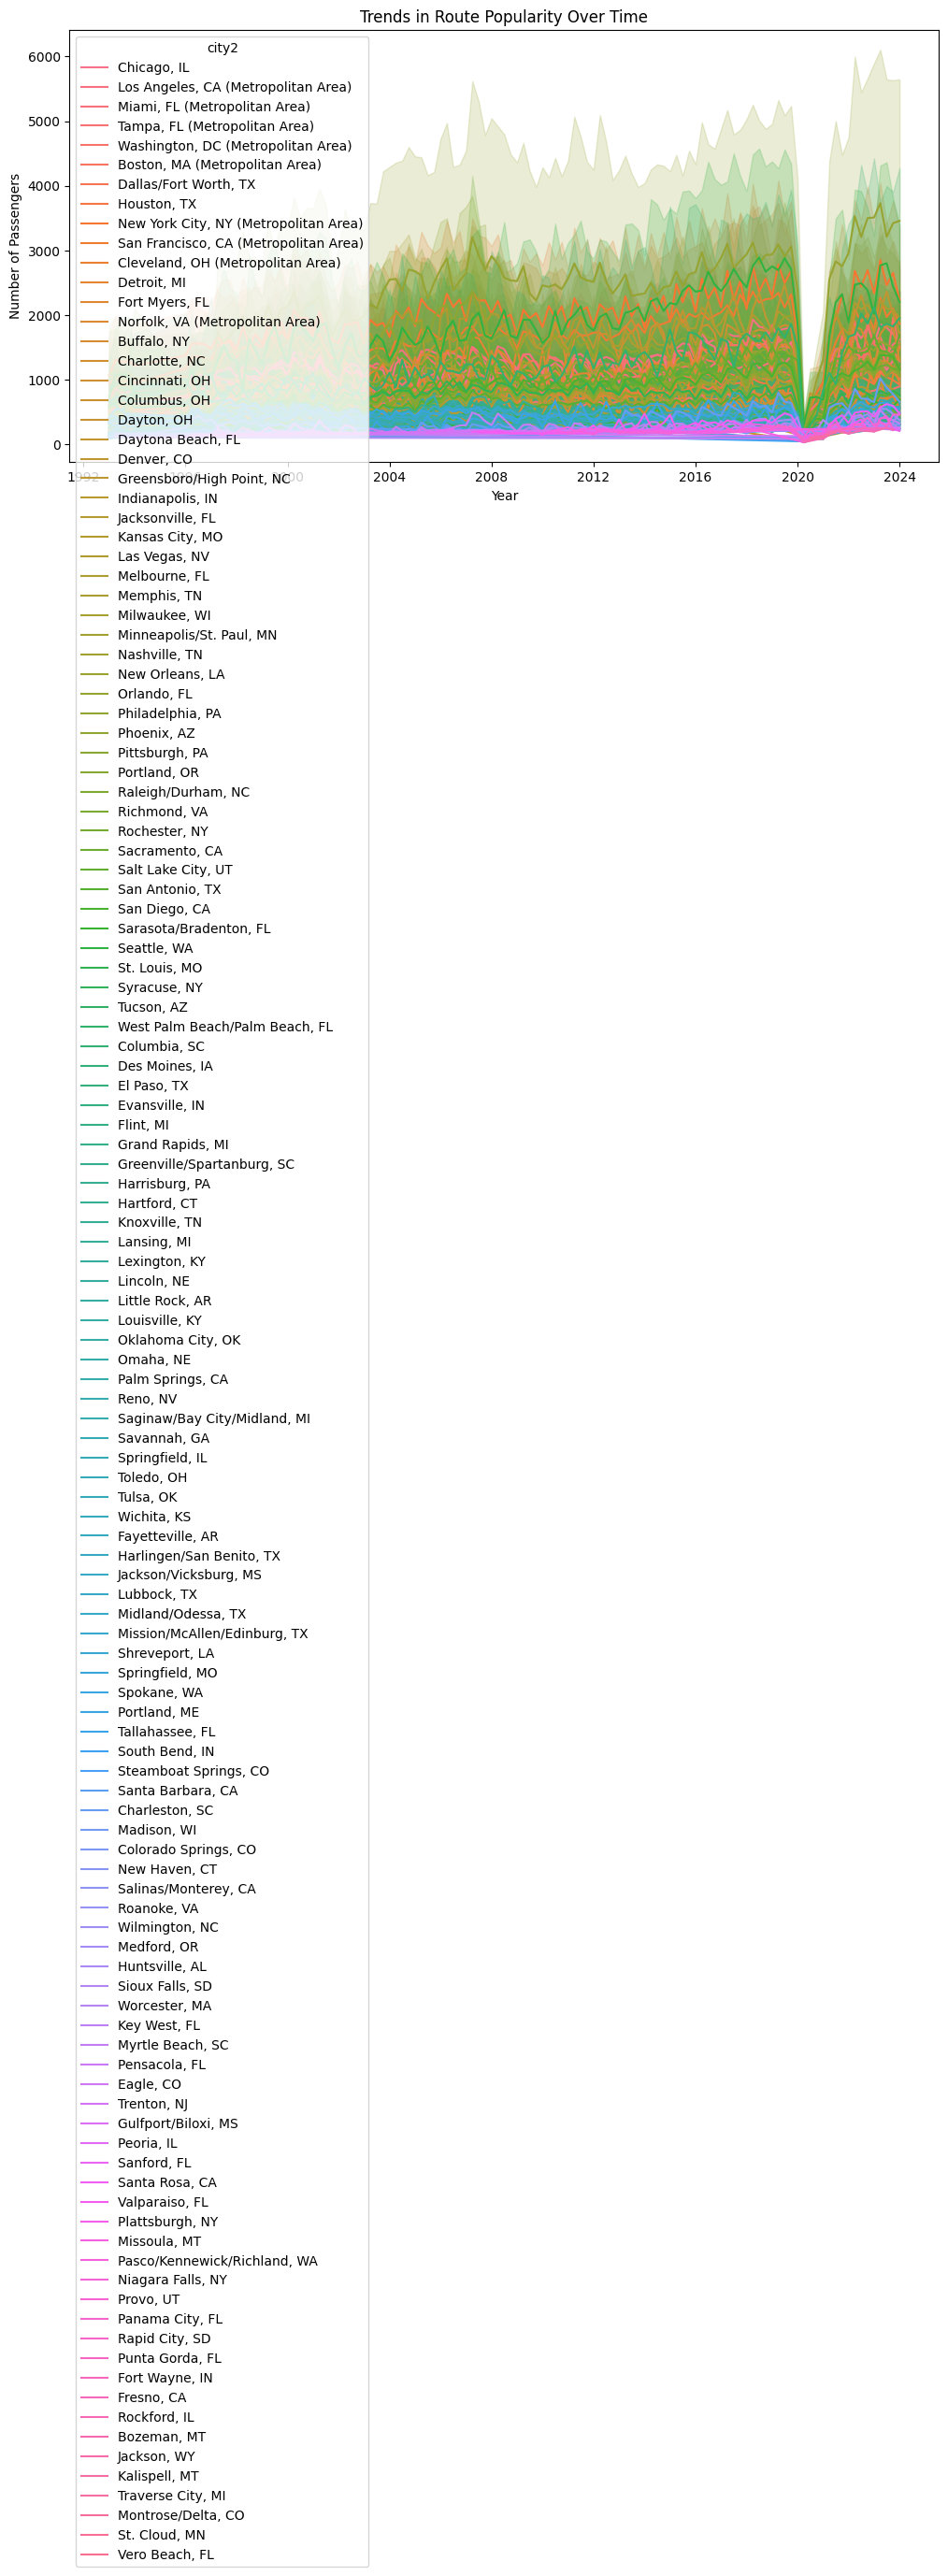

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='passengers', hue='city2', data=popular_routes)
plt.title('Trends in Route Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

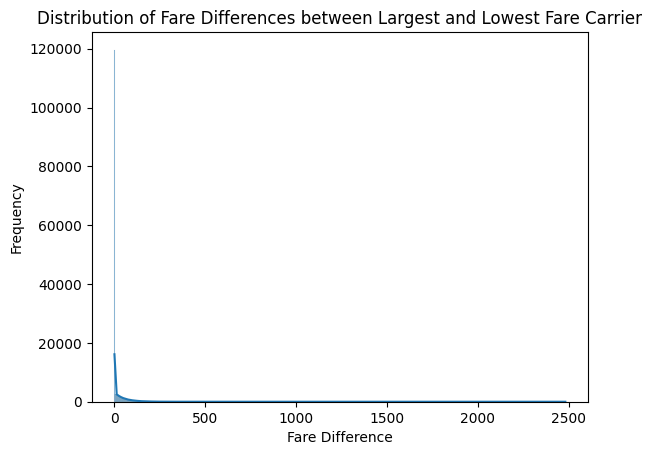

In [48]:
df['fare_difference'] = df['fare_lg'] - df['fare_low']
sns.histplot(df['fare_difference'], kde=True)
plt.title('Distribution of Fare Differences between Largest and Lowest Fare Carrier')
plt.xlabel('Fare Difference')
plt.ylabel('Frequency')
plt.show()

In [49]:
performance_metrics = df.groupby(['carrier_lg', 'city1', 'city2'])[['large_ms', 'fare_lg']].mean().reset_index()

In [50]:
top_carriers = df['carrier_lg'].value_counts().index[:5]
df_top_carriers = df[df['carrier_lg'].isin(top_carriers)]

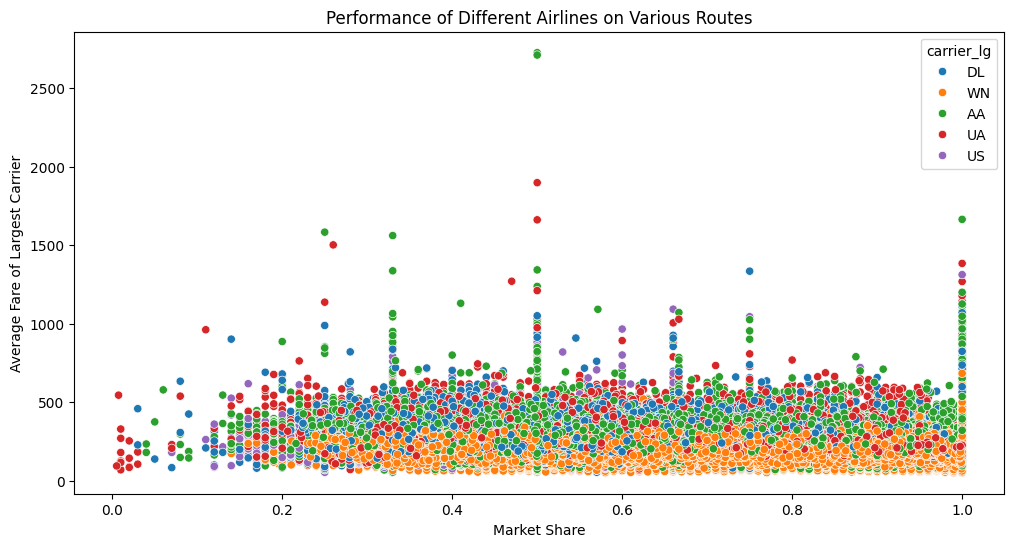

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='large_ms', y='fare_lg', hue='carrier_lg', data=df_top_carriers)
plt.title('Performance of Different Airlines on Various Routes')
plt.xlabel('Market Share')
plt.ylabel('Average Fare of Largest Carrier')
plt.show()